In [1]:
# imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

Импорт нужных библиотек

In [2]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')
data.rename(columns={"v1": "target","v2": "sentence","Unnamed: 2": "1","Unnamed: 3": "2","Unnamed: 4": "3"},inplace=True)
data.head(n=25)

,target,sentence,1,2,3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
data.shape[0]

5572

## 
Гистограмма распределения спам и не спам сообщений по датасету.

<function matplotlib.pyplot.show(close=None, block=None)>

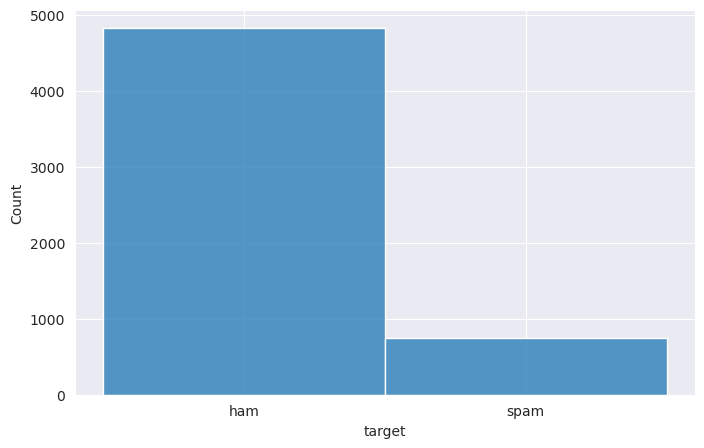

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(data.target)
plt.show

In [5]:
data.target.loc[data.target=='ham']=0
data.target.loc[data.target=='spam']=1

In [6]:
data.head()

,target,sentence,1,2,3
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Распределение по долям сколько спам сообщений и нормальных

In [7]:
data.target.value_counts(normalize=True)

target
0    0.865937
1    0.134063
Name: proportion, dtype: float64

Количество пропусков по фичам

In [8]:
data.isna().sum()

target         0
sentence       0
1           5522
2           5560
3           5566
dtype: int64

Сколько уникальных сообщений(расписано на все фичи, но важно только сколько именно сообщений уникальных)

In [9]:
data.nunique()

target         2
sentence    5169
1             43
2             10
3              5
dtype: int64

Убираем дублирующиеся сообщения

In [10]:
data.drop(data[data.duplicated(subset='sentence')].index,inplace=True)

In [11]:
data.describe()

,target,sentence,1,2,3
count,5169,5169,43,10,5
unique,2,5169,43,10,5
top,0,"Go until jurong point, crazy.. Available only ...",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,4516,1,1,1,1


In [12]:
data['sym_len'] = data.sentence.apply(len)
data['word_len'] = data.sentence.apply(lambda x: len(x.split()))

Посмотрим количество символов и слов в каждом сообщении (Датасет маленький, так что обрезать не будем ничего, а так можно было бы тяжелые хвосты обрезать).

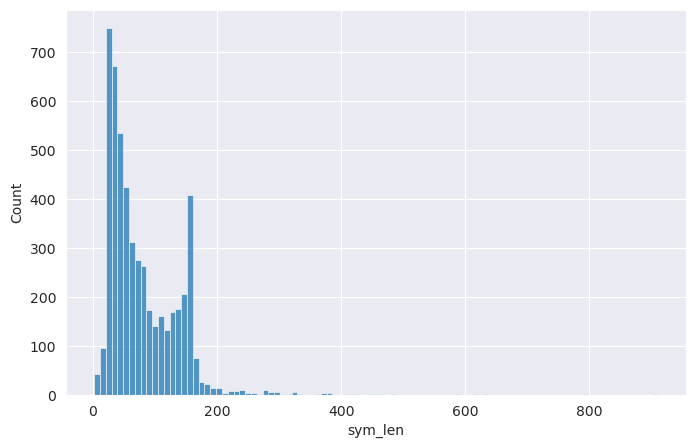

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data.sym_len)
plt.show()

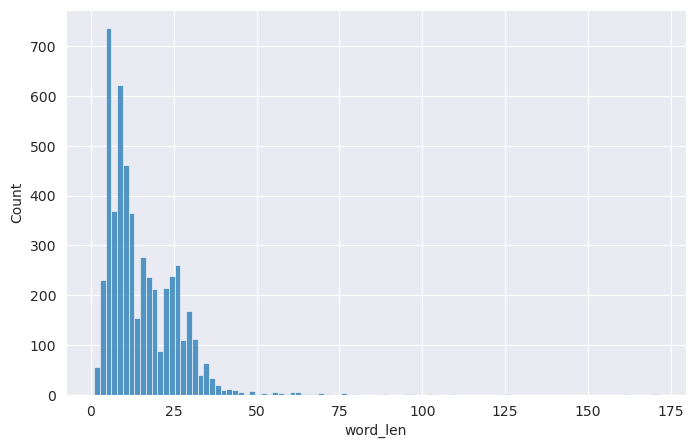

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data.word_len)
plt.show()

Теперь непосредственно обработка текста. Сделаем лемматизацию.

In [15]:
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [16]:
lemmatizer=WordNetLemmatizer()

In [17]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    return ' '.join(text)

In [18]:
data['text'] = data.apply(lambda row: preprocess(row.sentence), axis=1)

In [19]:
data=data[['target','sentence','text','1','2','3','sym_len','word_len']]
data.head()

,target,sentence,text,1,2,3,sym_len,word_len
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,NaN,NaN,NaN,111,20
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,NaN,NaN,NaN,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,NaN,NaN,NaN,155,28
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,NaN,NaN,NaN,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he go to usf he life around her...,NaN,NaN,NaN,61,13


Подлеим данные на тест и трейн в пропорции 20:80

In [20]:
train,test=train_test_split(data,train_size=0.8,random_state=42)

In [21]:
x_train=train.drop(['target'],axis=1)
y_train=train['target']
x_test=test.drop(['target'],axis=1)
y_test=test['target']

Присвоим каждому слову свой вектор, используя tfidf

In [22]:
tfidfvect=TfidfVectorizer(min_df=0.01,ngram_range=(1,2))

In [23]:
tfidf_train=tfidfvect.fit_transform(x_train['text'])

In [24]:
tfidf_train.shape

(4135, 223)

In [25]:
tfidf_test=tfidfvect.transform(x_test['text'])

In [26]:
tfidf_test.shape

(1034, 223)

In [27]:
print(tfidf_train[0])

  (0, 111)	0.49748544889943774
  (0, 199)	0.8674723212491133


In [28]:
print(x_train['sym_len'].head())

2228     30
5529     25
2149     34
5058    145
5051    111
Name: sym_len, dtype: int64


подбор гиперпараметров с помощью гридсёрча

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn import preprocessing
from sklearn import utils

In [31]:
grid={
    'n_estimators': [10,20,40],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None,'balanced']
}
rf=RandomForestClassifier(random_state=42)

In [32]:
cv_rf=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='roc_auc')
lab = preprocessing.LabelEncoder()
y_transformed_train = lab.fit_transform(y_train)
y_transformed_test = lab.fit_transform(y_test)
model=cv_rf.fit(tfidf_train,y_transformed_train)
pred=model.predict(tfidf_test)
accuracy=f1_score(y_transformed_test,pred)

In [33]:
best_params=model.best_params_
model.best_score_


0.9784555744528906

In [34]:
print(f"best parameters:\n{'        '.join(' : '.join(str(b) for b in a) for a in best_params.items())}\nscore of the model {accuracy:.3f}")

best parameters:
class_weight : balanced        max_features : log2        min_samples_leaf : 1        n_estimators : 40
score of the model 0.858


Рассмотрим теперь векторизацию с помощью Word2Vec

In [35]:
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [36]:
w2v=data['text'].tolist()

In [54]:
w_model=Word2Vec(sentences=w2v,sg=1,vector_size=100,min_count=1,window=5)

In [55]:
w_model.train(w2v,total_examples=len(w2v),epochs=10)

(600135, 3511320)

In [56]:
def get_vector(text,model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if vectors:
        vector=np.mean(vectors,axis=0)
    else:
        vector=np.zeros(model.vector_size)
    return vector

In [57]:
data['vector']=data['text'].apply(lambda x: get_vector(x,w_model))

In [58]:
data=data[['target','sentence','text','vector','1','2','3','sym_len','word_len']]
data.head()

,target,sentence,text,vector,1,2,3,sym_len,word_len
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[-0.04397035, 0.14660543, 0.034888785, 0.08752...",NaN,NaN,NaN,111,20
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[-0.06626068, 0.16986366, 0.031319488, 0.09013...",NaN,NaN,NaN,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[-0.052553423, 0.13682844, 0.04987586, 0.07471...",NaN,NaN,NaN,155,28
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[-0.024715582, 0.13852721, 0.038059805, 0.1030...",NaN,NaN,NaN,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he go to usf he life around her...,"[-0.061798897, 0.15610017, 0.024575356, 0.0807...",NaN,NaN,NaN,61,13


In [59]:
X=np.array(data['vector'].tolist())
y=data['target'].values
if y.dtype != np.int64:
    y = y.astype(np.int64)

In [60]:
w_x_train,w_x_test,w_y_train,w_y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
w_cv_rf=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='roc_auc')
wcv_model=w_cv_rf.fit(w_x_train,w_y_train)
w_pred=wcv_model.predict(w_x_test)
w_accuracy=accuracy_score(w_y_test,w_pred)
y_scores = wcv_model.predict_proba(w_x_test)[:, 1]
pr_auc = average_precision_score(w_y_test,y_scores)

In [62]:
w_accuracy

0.9284332688588007

Добавил это потому что должен справляться лучше с дисбалансом классов

In [63]:
pr_auc

0.7948885158238226

In [64]:
w_best_params=wcv_model.best_params_

In [65]:
print(f"best parameters:\n{'        '.join(' : '.join(str(b) for b in a) for a in w_best_params.items())}\nscore of the model {w_accuracy:.3f}")

best parameters:
class_weight : balanced        max_features : sqrt        min_samples_leaf : 3        n_estimators : 40
score of the model 0.928


In [66]:
print(classification_report(w_y_test, w_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       889
           1       0.80      0.65      0.72       145

    accuracy                           0.93      1034
   macro avg       0.87      0.81      0.84      1034
weighted avg       0.92      0.93      0.93      1034

